In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [13]:
from google.colab import files
uploaded = files.upload()

Saving clientes.csv to clientes (1).csv


In [14]:
df = pd.read_csv('clientes.csv')
df.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589


In [15]:
# Anonimizar el campo direccion a traves de la eliminacion
df.drop('direccion', axis=1, inplace=True)
df.head()

,nombre,edad,categoria,salario
0,Richard Martin,62,0,61050
1,James Jones,65,1,53824
2,Patricia Wilson,18,0,60281
3,Elizabeth Robinson,21,1,42187
4,Charles Brown,21,1,37589


In [16]:
# Animizar el campo edad a traves del redondeo
df['edad'] = (df['edad'] // 10) * 10
df.head()

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61050
1,James Jones,60,1,53824
2,Patricia Wilson,10,0,60281
3,Elizabeth Robinson,20,1,42187
4,Charles Brown,20,1,37589


In [17]:
# Anonimizar el campo salario a traves de la agregacion de ruido
ruido = np.random.normal(0, 100, size=df['salario'].shape)
df['salario'] += ruido
df.head()

,nombre,edad,categoria,salario
0,Richard Martin,60,0,60935.312561
1,James Jones,60,1,53739.744278
2,Patricia Wilson,10,0,60269.851295
3,Elizabeth Robinson,20,1,42103.395332
4,Charles Brown,20,1,37580.481869


In [18]:
# Pseudonimizar el campo nombre
for i in range(len(df)):
  df.loc[i, 'nombre'] = 'cliente' + str(i)
df.head()

,nombre,edad,categoria,salario
0,cliente0,60,0,60935.312561
1,cliente1,60,1,53739.744278
2,cliente2,10,0,60269.851295
3,cliente3,20,1,42103.395332
4,cliente4,20,1,37580.481869


In [19]:
# Balancear los datos de categorias
agrupado = df.groupby('categoria')

df_balanceado = pd.DataFrame()

for nombre, grupo in agrupado:
  grupo_balanceado = resample(grupo,
                              replace=True,
                              n_samples=100,
                              random_state=42)
  df_balanceado = pd.concat([df_balanceado, grupo_balanceado])

df_balanceado

,nombre,edad,categoria,salario
122,cliente122,30,0,77758.210472
35,cliente35,10,0,30513.478466
173,cliente173,60,0,35316.112874
141,cliente141,30,0,62868.402553
46,cliente46,50,0,49658.092790
...,...,...,...,...
129,cliente129,60,1,54529.044334
102,cliente102,30,1,73392.048950
170,cliente170,50,1,62822.518490
21,cliente21,40,1,53275.157455


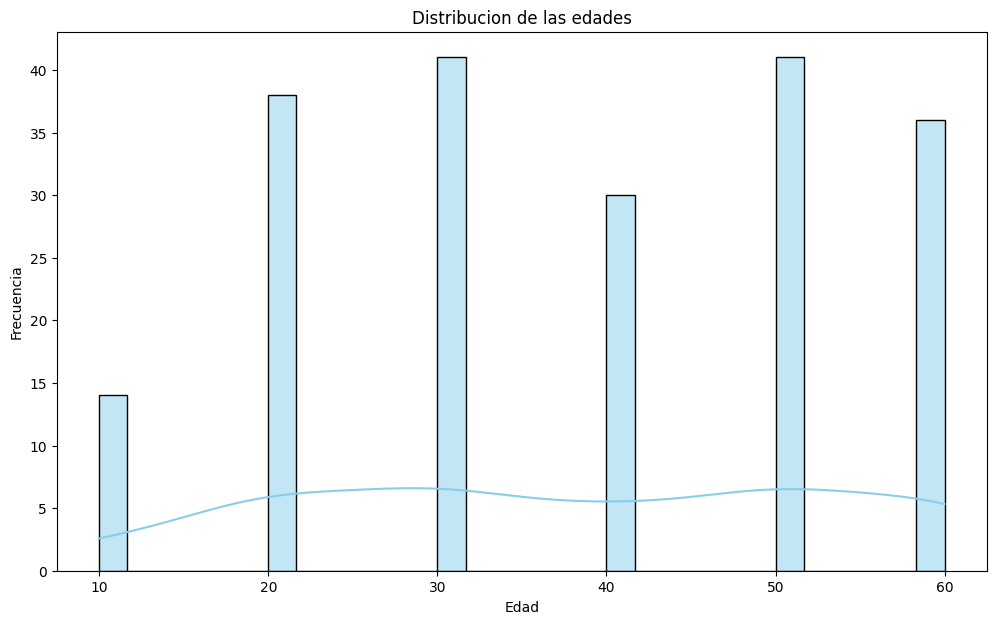

In [20]:
# Visualizacion 1: Distribucion de las edades con curva de densidad
plt.figure(figsize=(12,7))
ax = sns.histplot(df['edad'], kde=True, color='skyblue', bins=30)
ax.set_title('Distribucion de las edades')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia');

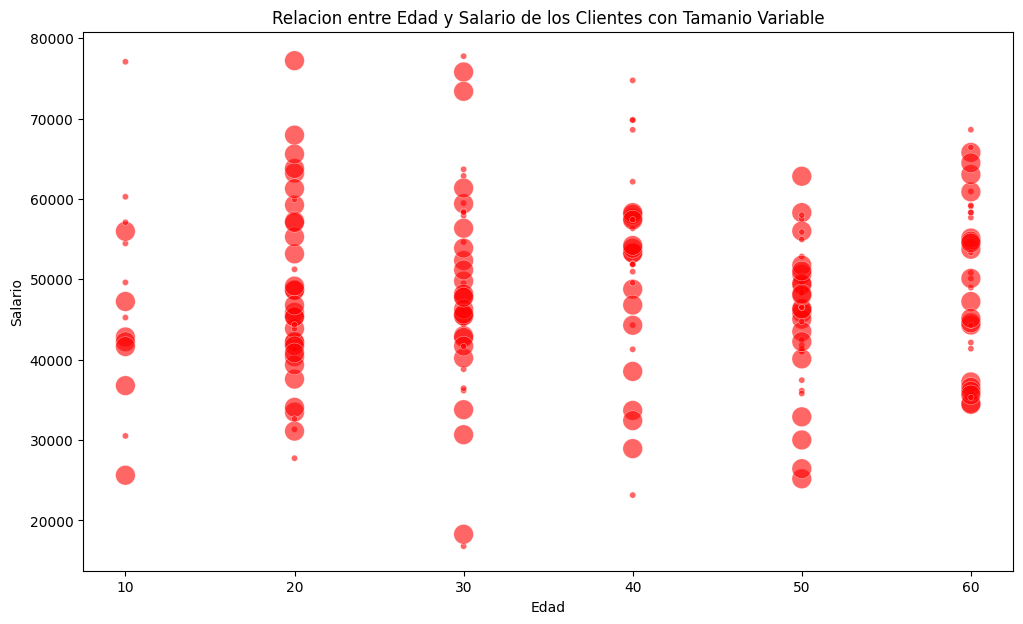

In [21]:
# Visualizacion 2: Relacioin entre Edad y Salario con tamanio variable
plt.figure(figsize=(12,7))
sizes = df['categoria'].replace({0: 50, 1: 100}) # Asignar tamanio segun categoria para ilustrar
scatter = sns.scatterplot(x='edad',
                          y='salario',
                          size=sizes,
                          legend=False,
                          sizes=(20, 200),
                          data=df,
                          color='red',
                          alpha=0.6)
scatter.set(title='Relacion entre Edad y Salario de los Clientes con Tamanio Variable',
            xlabel='Edad',
            ylabel='Salario');

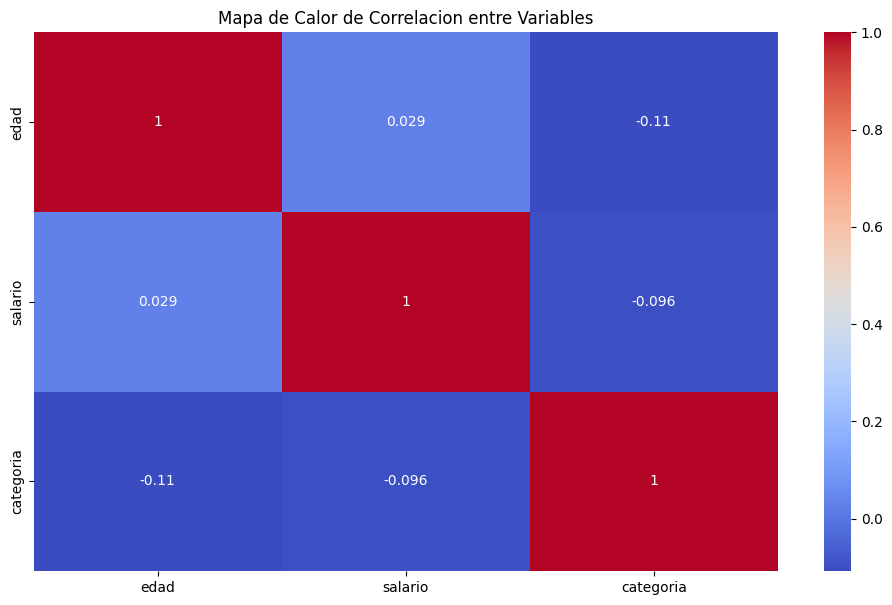

In [22]:
# Visualizacion 3: Mapa de Calor de Correlacion entre Variables
plt.figure(figsize=(12,7))
# Calculamos la matriz de correlacion
correlation_matrix = df[['edad', 'salario', 'categoria']].corr()
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      cmap='coolwarm')
heatmap.set(title='Mapa de Calor de Correlacion entre Variables');